## Tugas Besar Analisis Kompleksitas Algoritma
# **Analisis Perbandingan Kompleksitas Algoritma Selection Sort dan Merge Sort dalam Pengurutan Data**

> Bertujuan untuk menganalisis perbandingan kompleksitas algoritma Selection Sort dan Merge Sort dalam pengurutan data. Kedua algoritma ini memiliki pendekatan yang berbeda dalam menyelesaikan permasalahan sorting, di mana selection sort menggunakan metode pemilihan elemen minimum secara iteratif, sedangkan merge sort menggunakan pendekatan divide and conquer yang membagi data menjadi bagian-bagian lebih kecil sebelum disatukan kembali dalam urutan yang benar.


## Kelompok X IF-48-02

1.   Hanif Haidar Fathin Mumtaz - 103012300072
2.   Danang Setiyoadi - 1030123000233
3.   Muhammad Rayya Daeng Raja - 103012300041


**Dataset:** `laptop_price.csv` (kolom utama untuk sorting: `Price_euros`)

## Tujuan
1. Mengimplementasikan:
   - **Selection Sort (iteratif)**
   - **Merge Sort (rekursif)**
2. Menganalisis efisiensi:
   - Menentukan **kelas kompleksitas waktu** (teori)
   - Mengukur **running time** untuk berbagai ukuran input hingga **10.000**
   - Membuat **grafik running time**
   - Membuat **analisis empiris**: normalisasi terhadap fungsi kompleksitas dan estimasi slope log-log


## Import & Load Dataset

In [ ]:
import kagglehub
import pandas as pd
import os, glob

# Download dataset
path = kagglehub.dataset_download("muhammetvarl/laptop-price")
print("Dataset folder:", path)

# Cari file CSV (biasanya laptop_price.csv)
csv_path = os.path.join(path, "laptop_price.csv")

if not os.path.exists(csv_path):
    csv_files = glob.glob(os.path.join(path, "*.csv"))
    print("CSV files found:", csv_files)
    if not csv_files:
        raise FileNotFoundError("Tidak ada file .csv ditemukan di folder dataset.")
    csv_path = csv_files[0]

print("CSV path:", csv_path)

# Load dataframe
df = pd.read_csv(csv_path, encoding="ISO-8859-1")
print("Loaded shape:", df.shape)
df.head()


100%|██████████| 28.0k/28.0k [00:00<00:00, 23.6MB/s]

Extracting files...
Dataset folder: /root/.cache/kagglehub/datasets/muhammetvarl/laptop-price/versions/1
CSV path: /root/.cache/kagglehub/datasets/muhammetvarl/laptop-price/versions/1/laptop_price.csv
Loaded shape: (1303, 13)


,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [ ]:
import pandas as pd
import numpy as np
import random
import time
import statistics
import math
import matplotlib.pyplot as plt

# Reproducible
random.seed(42)
np.random.seed(42)

print("Shape:", df.shape)
df.head()
df.tail()

Shape: (1303, 13)


,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


## Sorting

In [ ]:
# Ambil kolom harga sebagai data dasar (numerik)
base_prices = df["Price_euros"].dropna().astype(float).tolist()

print("Jumlah data harga (non-NA):", len(base_prices))
print("Contoh 10 data:", base_prices[:10])

# Statistik ringkas
series_prices = pd.Series(base_prices)
series_prices.describe()


Jumlah data harga (non-NA): 1303
Contoh 10 data: [1339.69, 898.94, 575.0, 2537.45, 1803.6, 400.0, 2139.97, 1158.7, 1495.0, 770.0]


,0
count,1303.000000
mean,1123.686992
std,699.009043
min,174.000000
25%,599.000000
50%,977.000000
75%,1487.880000
max,6099.000000


## Visualisasi Data

> Histogram menunjukkan mayoritas harga terkonsentrasi di rentang tertentu, sedangkan boxplot membantu melihat outlier (harga sangat tinggi) yang dapat mempengaruhi sebaran, tetapi tidak mengubah kelas kompleksitas sorting—kompleksitas dipengaruhi oleh ukuran input (n), bukan besar kecil nilainya.



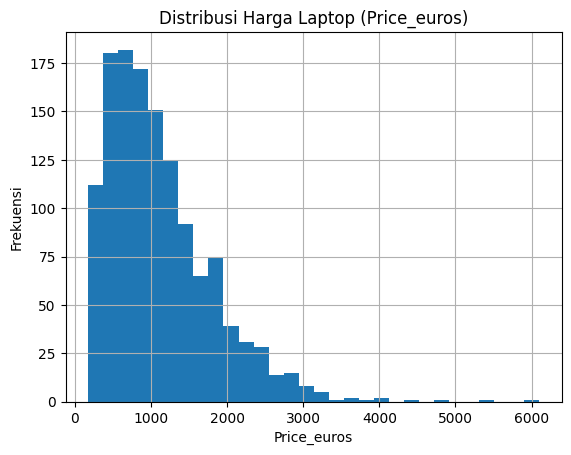

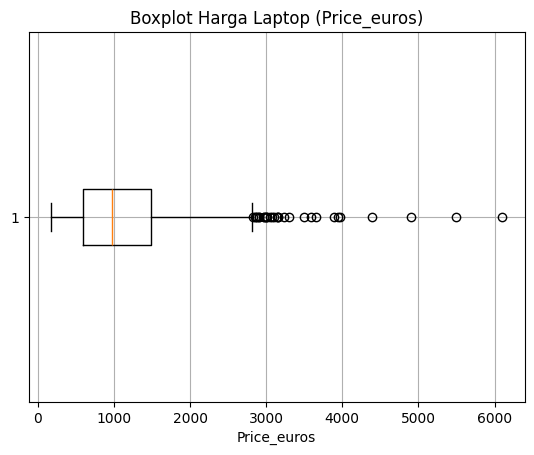

In [ ]:
# Histogram distribusi Price_euros
plt.figure()
plt.hist(base_prices, bins=30)
plt.title("Distribusi Harga Laptop (Price_euros)")
plt.xlabel("Price_euros")
plt.ylabel("Frekuensi")
plt.grid(True)
plt.show()

# Boxplot untuk melihat sebaran & outlier
plt.figure()
plt.boxplot(base_prices, vert=False)
plt.title("Boxplot Harga Laptop (Price_euros)")
plt.xlabel("Price_euros")
plt.grid(True)
plt.show()


## Generator Data untuk Berbagai Ukuran Input

In [ ]:
def sample_prices(n):
    """Ambil n data dari base_prices dengan pengulangan agar bisa n > ukuran dataset asli."""
    return random.choices(base_prices, k=n)

def make_input(n, mode="random", swap_ratio=0.1, bin_size=50):
    """
    Membuat variasi kondisi input untuk analisis:
    - random: acak (average-like)
    - sorted: sudah terurut naik
    - reverse: terurut turun
    - nearly_sorted: hampir terurut (sebagian kecil di-swap)
    - duplicates: banyak duplikat (harga dibinning)
    """
    if mode == "random":
        return sample_prices(n)

    if mode == "sorted":
        a = sample_prices(n)
        a.sort()
        return a

    if mode == "reverse":
        a = sample_prices(n)
        a.sort(reverse=True)
        return a

    if mode == "nearly_sorted":
        a = sample_prices(n)
        a.sort()
        swaps = int(n * swap_ratio)
        for _ in range(swaps):
            i = random.randrange(n)
            j = random.randrange(n)
            a[i], a[j] = a[j], a[i]
        return a

    if mode == "duplicates":
        binned = [round(x / bin_size) * bin_size for x in base_prices]
        return random.choices(binned, k=n)

    raise ValueError("mode tidak dikenal")


## Implementasi Algoritma

### Selection sort (iteratif)

In [ ]:
def selection_sort(arr):
    """
    Selection Sort (Iteratif)
    Ide: pada setiap posisi i, cari elemen minimum di i..n-1 lalu swap ke posisi i.
    Kompleksitas waktu: O(n^2) untuk perbandingan, karena loop bersarang.
    """
    a = arr[:]  # copy agar tidak merusak input asli
    n = len(a)
    for i in range(n - 1):
        min_idx = i
        for j in range(i + 1, n):
            if a[j] < a[min_idx]:
                min_idx = j
        a[i], a[min_idx] = a[min_idx], a[i]
    return a


### Merge Sort (Rekursif)

In [ ]:
def merge(left, right):
    """Menggabungkan 2 list terurut menjadi 1 list terurut."""
    merged = []
    i = j = 0
    while i < len(left) and j < len(right):
        if left[i] <= right[j]:
            merged.append(left[i]); i += 1
        else:
            merged.append(right[j]); j += 1
    merged.extend(left[i:])
    merged.extend(right[j:])
    return merged

def merge_sort(arr):
    """
    Merge Sort (Rekursif)
    Ide: divide and conquer -> bagi array menjadi dua, urutkan masing-masing (rekursif), lalu merge.
    Kompleksitas waktu: O(n log n) (pembagian log n level, tiap level proses merge total n).
    """
    if len(arr) <= 1:
        return arr
    mid = len(arr) // 2
    left = merge_sort(arr[:mid])
    right = merge_sort(arr[mid:])
    return merge(left, right)


## Validasi Data

In [ ]:
test = make_input(50, mode="random")
assert selection_sort(test) == sorted(test)
assert merge_sort(test) == sorted(test)
print("OK: Kedua algoritma menghasilkan output terurut dengan benar.")

OK: Kedua algoritma menghasilkan output terurut dengan benar.


## Teori Kompleksitas Waktu

### 1) Selection Sort (Iteratif)
- Loop luar: i = 0..n-2
- Loop dalam: mencari minimum pada sisa elemen (≈ n-i-1 per iterasi)
- Total perbandingan: (n-1) + (n-2) + ... + 1 = n(n-1)/2
- Maka: **T(n) = O(n²)** (best/average/worst sama-sama kuadratik dalam jumlah perbandingan)

### 2) Merge Sort (Rekursif)
- Membagi array menjadi dua hingga ukuran 1 → kedalaman ≈ log₂(n)
- Pada setiap level, proses merge total biaya ≈ n
- Maka: **T(n) = O(n log n)** (best/average/worst umumnya sama kelasnya)

## Fungsi Benchmark Running Time

In [ ]:
def time_algorithm(algo, data, repeats=3):
    """
    Mengukur running time menggunakan median dari beberapa pengulangan.
    repeats kecil agar tidak terlalu berat, tetapi cukup untuk mengurangi noise.
    """
    times = []
    for _ in range(repeats):
        arr = data[:]  # copy supaya input sama dan adil
        t0 = time.perf_counter()
        _ = algo(arr)
        t1 = time.perf_counter()
        times.append(t1 - t0)
    return statistics.median(times)

## Menentukan Ukuran Input (hingga 10.000)

In [ ]:
# Ukuran input untuk Merge Sort (rapat: 1, 10, 20, ..., 10000)
sizes_merge = [1] + list(range(10, 10001, 10))

# Ukuran input untuk Selection Sort (lebih jarang agar tidak terlalu lama)
# Tetap mencakup sampai 10000 dan mencakup ukuran kecil-menengah.
sizes_selection = (
    [1] +
    list(range(10, 1001, 10)) +      # rapat sampai 1000
    list(range(1500, 5001, 500)) +   # agak jarang
    list(range(6000, 10001, 1000))   # jarang di ukuran besar
)

print("Jumlah titik merge:", len(sizes_merge))
print("Jumlah titik selection:", len(sizes_selection))
print("Contoh sizes_selection:", sizes_selection[:20], "...", sizes_selection[-10:])

Jumlah titik merge: 1001
Jumlah titik selection: 114
Contoh sizes_selection: [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190] ... [3000, 3500, 4000, 4500, 5000, 6000, 7000, 8000, 9000, 10000]


## Eksperimen Running Time

In [ ]:
modes = ["random", "sorted", "reverse", "nearly_sorted", "duplicates"]
repeats = 3  # bisa dinaikkan 5-7 jika laptop kuat

rows = []

for mode in modes:
    # Merge Sort
    for n in sizes_merge:
        data = make_input(n, mode=mode)
        t = time_algorithm(merge_sort, data, repeats=repeats)
        rows.append({"mode": mode, "n": n, "algorithm": "Merge Sort (rekursif)", "time_sec": t})

    # Selection Sort
    for n in sizes_selection:
        data = make_input(n, mode=mode)
        t = time_algorithm(selection_sort, data, repeats=repeats)
        rows.append({"mode": mode, "n": n, "algorithm": "Selection Sort (iteratif)", "time_sec": t})

results = pd.DataFrame(rows)
results.head()


,mode,n,algorithm,time_sec
0,random,1,Merge Sort (rekursif),9.760000e-07
1,random,10,Merge Sort (rekursif),1.774300e-05
2,random,20,Merge Sort (rekursif),3.830300e-05
3,random,30,Merge Sort (rekursif),6.010300e-05
4,random,40,Merge Sort (rekursif),7.543900e-05


## Tabel Ringkas Hasil

In [ ]:
pivot = results.pivot_table(index=["mode", "n"], columns="algorithm", values="time_sec")
pivot.head(20)

algorithm       Merge Sort (rekursif)  Selection Sort (iteratif)
mode       n                                                    
duplicates 1             4.360000e-07               6.450000e-07
           10            1.681900e-05               5.086000e-06
           20            3.655300e-05               1.069100e-05
           30            5.824500e-05               2.171900e-05
           40            8.895200e-05               3.461600e-05
           50            1.101170e-04               6.363300e-05
           60            1.396180e-04               7.124700e-05
           70            1.636530e-04               9.453500e-05
           80            1.851320e-04               1.187010e-04
           90            2.243540e-04               1.521910e-04
           100           2.489260e-04               1.911600e-04
           110           2.733060e-04               2.252060e-04
           120           2.978530e-04               2.629900e-04
           130           3.448370e-04               3.046430e-04
           140           3.634200e-04               3.527870e-04
           150           4.030830e-04               4.181950e-04
           160           4.189940e-04               4.522940e-04
           170           4.434930e-04               5.152250e-04
           180           4.732810e-04               5.953700e-04
           190           4.613190e-04               6.518690e-04

## GRAFIK Running Time (Linear Scale)

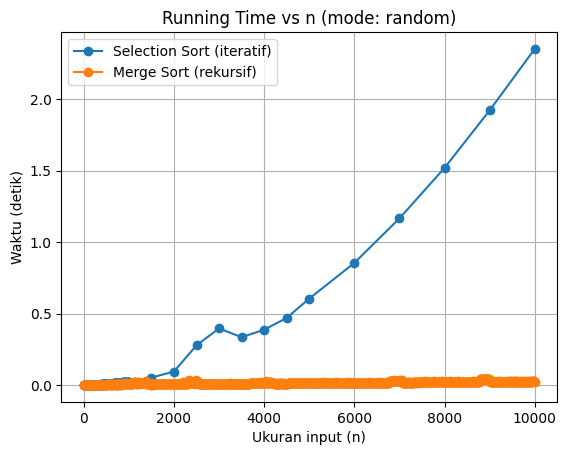

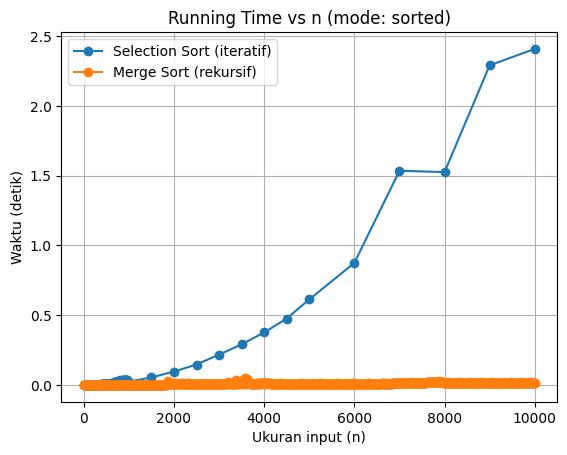

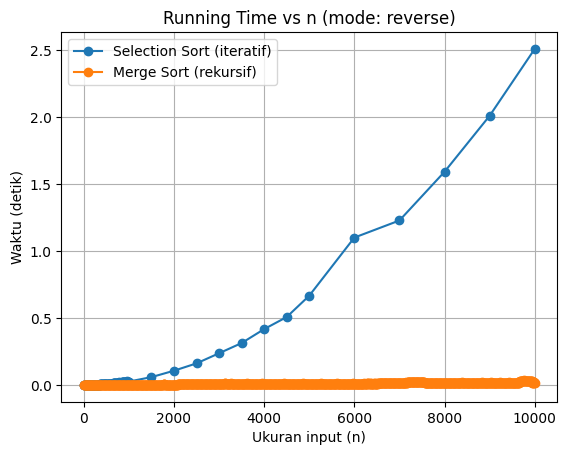

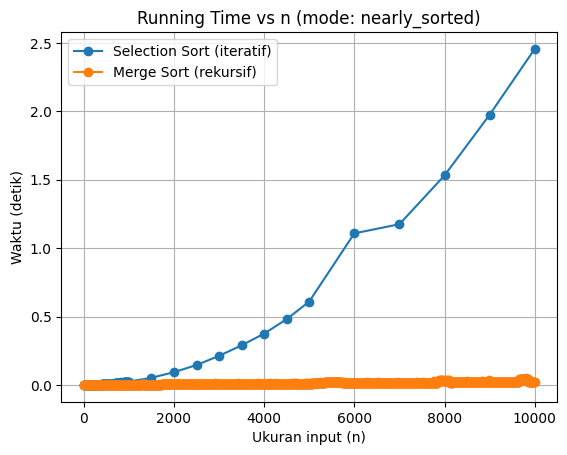

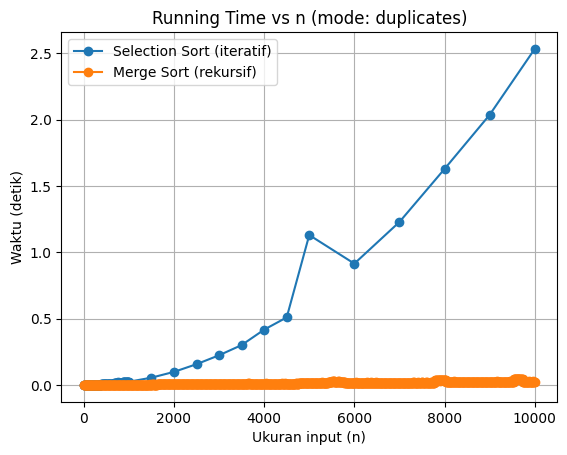

In [ ]:
for mode in modes:
    sub = results[results["mode"] == mode]

    plt.figure()
    for algo in ["Selection Sort (iteratif)", "Merge Sort (rekursif)"]:
        s = sub[sub["algorithm"] == algo].sort_values("n")
        plt.plot(s["n"], s["time_sec"], marker="o", label=algo)

    plt.title(f"Running Time vs n (mode: {mode})")
    plt.xlabel("Ukuran input (n)")
    plt.ylabel("Waktu (detik)")
    plt.legend()
    plt.grid(True)
    plt.show()


## GRAFIK Running Time (Log-Log) untuk melihat pola kompleksitas

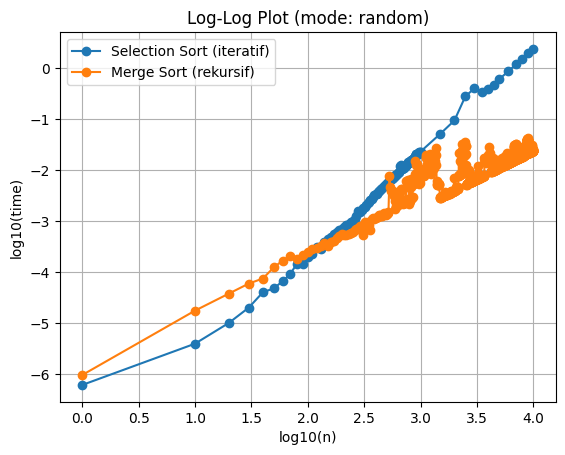

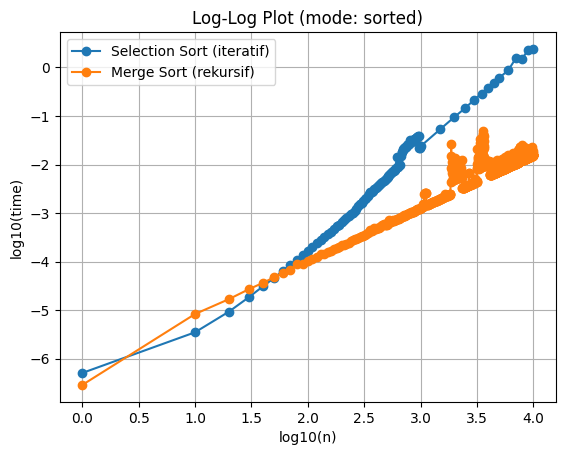

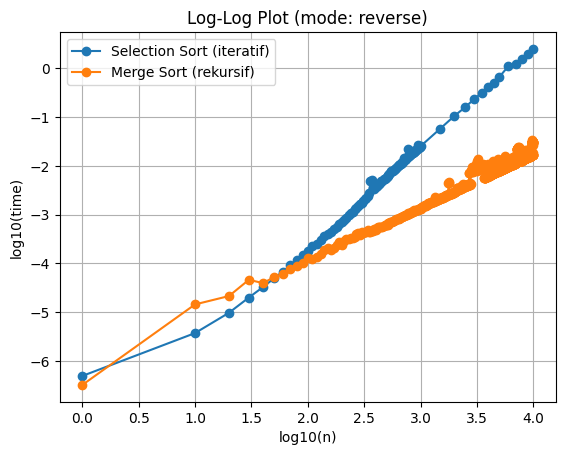

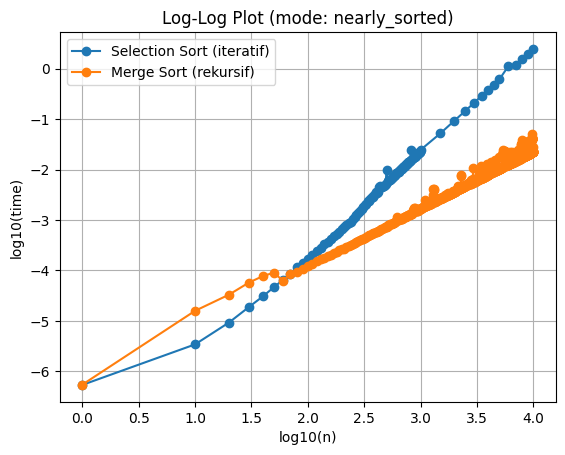

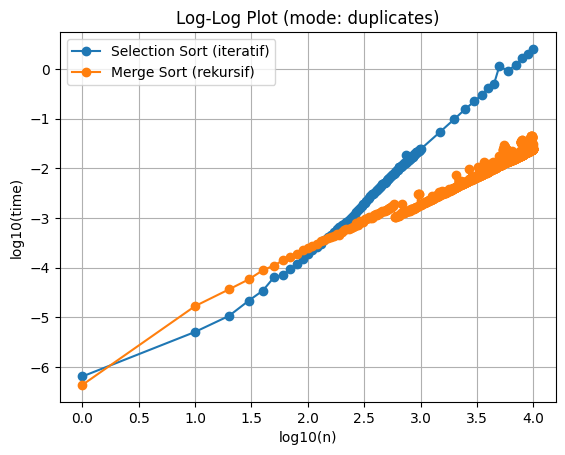

In [ ]:
for mode in modes:
    sub = results[results["mode"] == mode]

    plt.figure()
    for algo in ["Selection Sort (iteratif)", "Merge Sort (rekursif)"]:
        s = sub[sub["algorithm"] == algo].sort_values("n")
        # hindari log(0)
        s = s[(s["n"] > 0) & (s["time_sec"] > 0)]
        plt.plot(np.log10(s["n"]), np.log10(s["time_sec"]), marker="o", label=algo)

    plt.title(f"Log-Log Plot (mode: {mode})")
    plt.xlabel("log10(n)")
    plt.ylabel("log10(time)")
    plt.legend()
    plt.grid(True)
    plt.show()


## Analisis Empiris: Normalisasi terhadap O(n²) dan O(n log n)

> Kalau kompleksitasnya benar:

*   time / n² untuk Selection Sort → cenderung relatif “datar”
*   time / (n log n) untuk Merge Sort → cenderung relatif “datar”


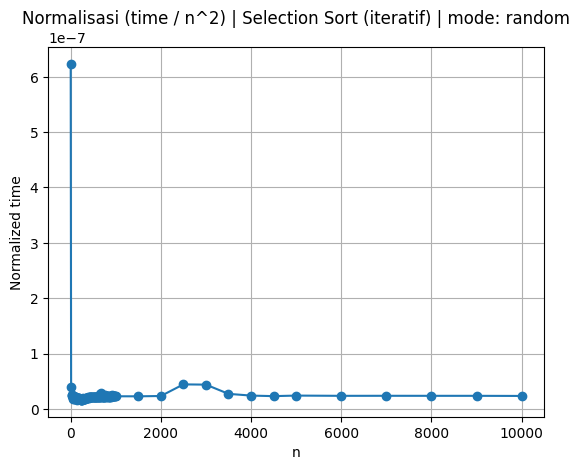

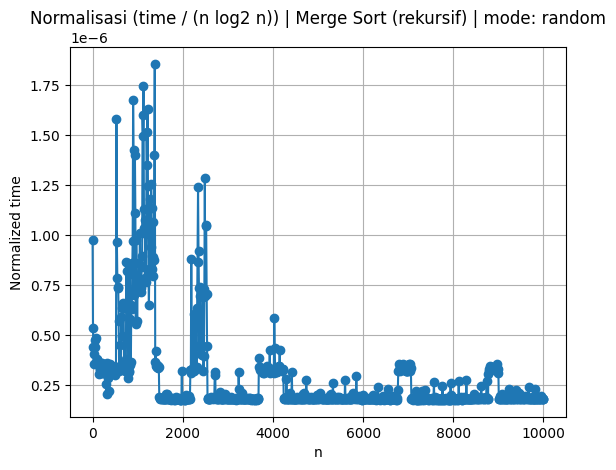

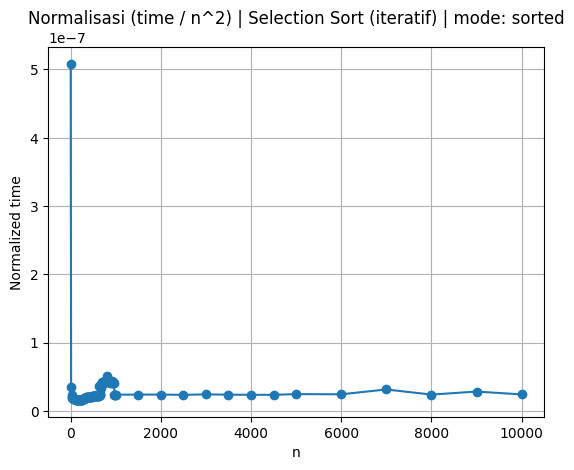

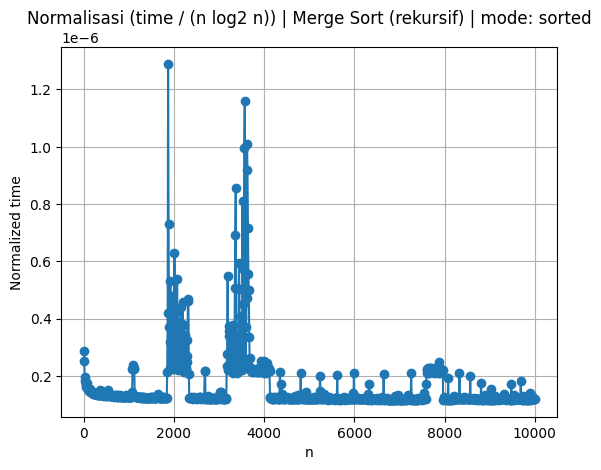

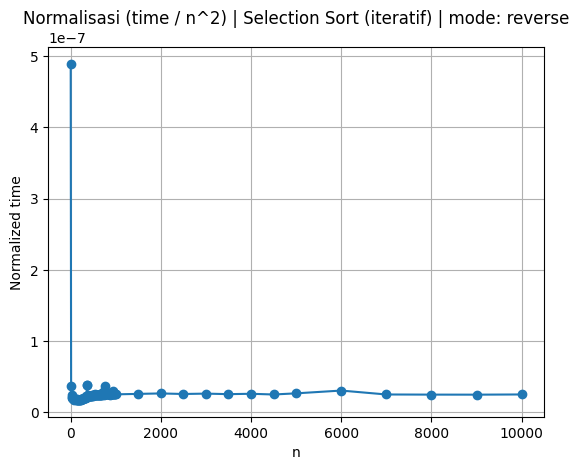

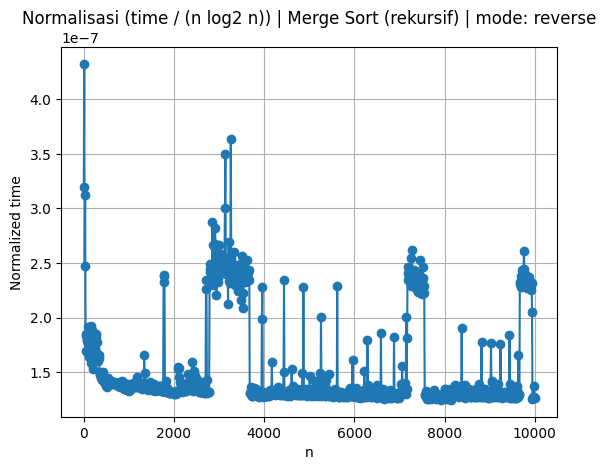

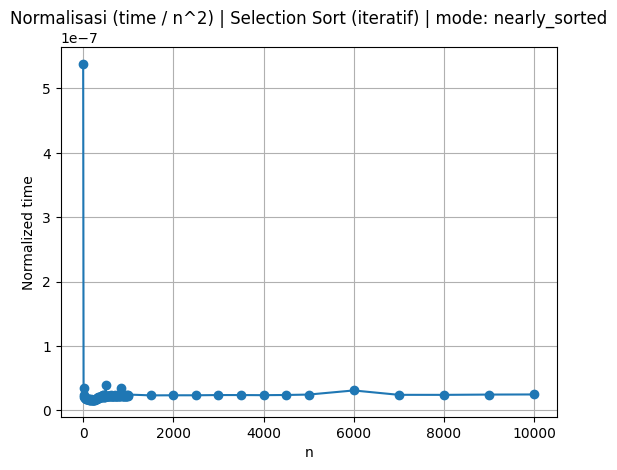

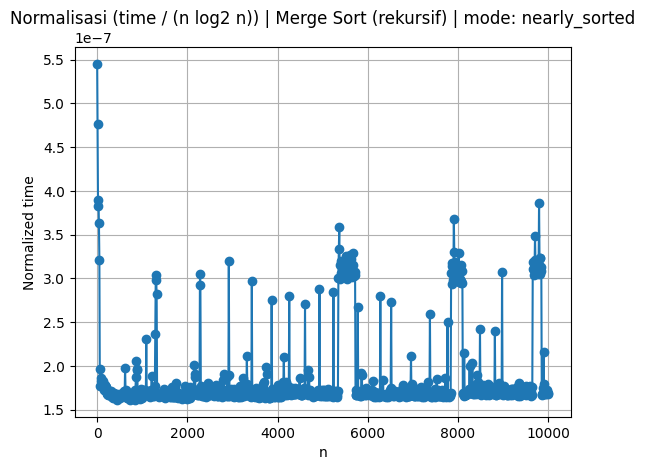

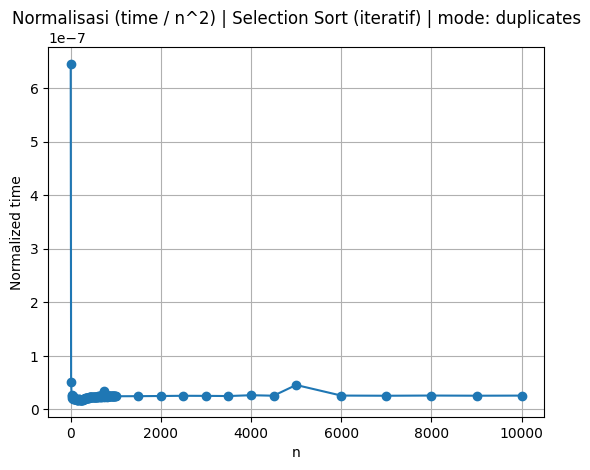

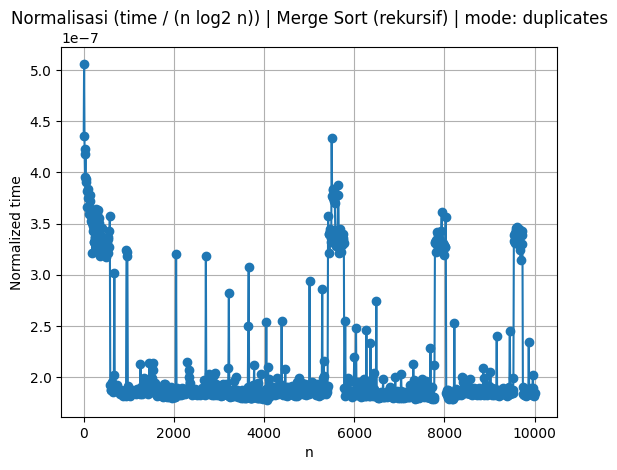

,mode,algorithm,normalized_mean,normalized_median
0,random,Selection Sort (iteratif),2.736716e-08,2.204879e-08
1,random,Merge Sort (rekursif),2.838573e-07,1.837441e-07
2,sorted,Selection Sort (iteratif),3.068617e-08,2.226467e-08
3,sorted,Merge Sort (rekursif),1.592223e-07,1.219222e-07
4,reverse,Selection Sort (iteratif),2.778824e-08,2.449871e-08
5,reverse,Merge Sort (rekursif),1.528679e-07,1.327329e-07
6,nearly_sorted,Selection Sort (iteratif),2.601810e-08,2.229314e-08
7,nearly_sorted,Merge Sort (rekursif),1.853716e-07,1.683067e-07
8,duplicates,Selection Sort (iteratif),2.838602e-08,2.342799e-08
9,duplicates,Merge Sort (rekursif),2.101009e-07,1.852261e-07


In [ ]:
def n_log_n(n):
    return n * math.log2(n) if n > 1 else 1.0

analysis_rows = []

for mode in modes:
    for algo in ["Selection Sort (iteratif)", "Merge Sort (rekursif)"]:
        sub = results[(results["mode"] == mode) & (results["algorithm"] == algo)].copy()
        sub = sub.sort_values("n")

        if algo == "Selection Sort (iteratif)":
            sub["normalized"] = sub["time_sec"] / (sub["n"]**2)
            norm_label = "time / n^2"
        else:
            sub["normalized"] = sub["time_sec"] / (sub["n"].apply(n_log_n))
            norm_label = "time / (n log2 n)"

        # Plot normalisasi
        plt.figure()
        plt.plot(sub["n"], sub["normalized"], marker="o")
        plt.title(f"Normalisasi ({norm_label}) | {algo} | mode: {mode}")
        plt.xlabel("n")
        plt.ylabel("Normalized time")
        plt.grid(True)
        plt.show()

        # simpan ringkasan
        analysis_rows.append({
            "mode": mode,
            "algorithm": algo,
            "normalized_mean": sub["normalized"].mean(),
            "normalized_median": sub["normalized"].median()
        })

pd.DataFrame(analysis_rows)

## Estimasi “Slope” Log-Log (Bukti Empiris Tambahan)

*   Selection Sort ~ slope mendekati 2
*   Merge Sort ~ slope mendekati 1 (sedikit >1 karena ada faktor log n)



In [ ]:
def estimate_loglog_slope(df_sub):
    """
    Estimasi slope dari log(time) = a*log(n) + b menggunakan polyfit.
    """
    df_sub = df_sub[(df_sub["n"] > 1) & (df_sub["time_sec"] > 0)].copy()
    x = np.log(df_sub["n"].values)
    y = np.log(df_sub["time_sec"].values)
    a, b = np.polyfit(x, y, 1)
    return a

slopes = []
for mode in modes:
    for algo in ["Selection Sort (iteratif)", "Merge Sort (rekursif)"]:
        sub = results[(results["mode"] == mode) & (results["algorithm"] == algo)].sort_values("n")
        slope = estimate_loglog_slope(sub)
        slopes.append({"mode": mode, "algorithm": algo, "estimated_slope": slope})

slopes_df = pd.DataFrame(slopes)
slopes_df


,mode,algorithm,estimated_slope
0,random,Selection Sort (iteratif),2.045074
1,random,Merge Sort (rekursif),0.877443
2,sorted,Selection Sort (iteratif),2.127962
3,sorted,Merge Sort (rekursif),1.083608
4,reverse,Selection Sort (iteratif),2.068204
5,reverse,Merge Sort (rekursif),1.109348
6,nearly_sorted,Selection Sort (iteratif),2.067081
7,nearly_sorted,Merge Sort (rekursif),1.155527
8,duplicates,Selection Sort (iteratif),2.049307
9,duplicates,Merge Sort (rekursif),1.061884


## Summary

In [ ]:
# Ringkas waktu terakhir (n terbesar) per mode & algoritma
summary = []
for mode in modes:
    for algo in ["Selection Sort (iteratif)", "Merge Sort (rekursif)"]:
        sub = results[(results["mode"] == mode) & (results["algorithm"] == algo)].sort_values("n")
        summary.append({
            "mode": mode,
            "algorithm": algo,
            "max_n_tested": int(sub["n"].max()),
            "time_at_max_n_sec": float(sub[sub["n"] == sub["n"].max()]["time_sec"].iloc[0])
        })

pd.DataFrame(summary)


,mode,algorithm,max_n_tested,time_at_max_n_sec
0,random,Selection Sort (iteratif),10000,2.352726
1,random,Merge Sort (rekursif),10000,0.023947
2,sorted,Selection Sort (iteratif),10000,2.408734
3,sorted,Merge Sort (rekursif),10000,0.015678
4,reverse,Selection Sort (iteratif),10000,2.509999
5,reverse,Merge Sort (rekursif),10000,0.016819
6,nearly_sorted,Selection Sort (iteratif),10000,2.455651
7,nearly_sorted,Merge Sort (rekursif),10000,0.022406
8,duplicates,Selection Sort (iteratif),10000,2.532988
9,duplicates,Merge Sort (rekursif),10000,0.024444


## Kesimpulan

Secara teori:
- **Selection Sort (iteratif)** memiliki kompleksitas waktu **O(n²)** karena menggunakan dua loop bersarang untuk mencari elemen minimum pada setiap iterasi.
- **Merge Sort (rekursif)** memiliki kompleksitas waktu **O(n log n)** karena membagi input menjadi dua secara rekursif (≈ log n level) dan melakukan proses penggabungan total biaya ≈ n di setiap level.

Secara empiris (berdasarkan grafik running time):
- Kurva waktu Selection Sort meningkat jauh lebih cepat ketika n membesar, konsisten dengan pertumbuhan kuadratik.
- Kurva waktu Merge Sort meningkat lebih landai dan konsisten dengan pertumbuhan n log n.

Bukti tambahan:
- Plot normalisasi **time / n²** untuk Selection Sort cenderung lebih stabil dibanding plot time mentah.
- Plot normalisasi **time / (n log n)** untuk Merge Sort cenderung lebih stabil dibanding plot time mentah.
- Estimasi slope log-log menunjukkan Selection Sort mendekati ~2, sedangkan Merge Sort mendekati ~1 (sedikit lebih besar karena faktor log n).

Dengan demikian, kelas kompleksitas waktu:
- Selection Sort: **O(n²)**
- Merge Sort: **O(n log n)**
